## ICESAT-2 - Vegetation Along-Track Products (ATL08)

This tutorial explains how to access the [ATL08 product](https://doi.org/10.5067/EFPFKKI2T96P) derived from ICESat-2 data. Originally provided by [Earth Data (NASA)](https://www.earthdata.nasa.gov/learn/find-data/near-real-time/icesat2-nrt) in [HDF5 format](https://en.wikipedia.org/wiki/Hierarchical_Data_Format), this data were downloaded by OpenGeoHub for Brazil, Europa, USA (without Alaska), Mozambique, Zambia, Malawi and Zimbabwe, converted to [Parquet format](https://www.upsolver.com/blog/apache-parquet-why-use) and made publicly available through S3 protocol. In total were download 20,370 HDF5 files and extracted millions of data points for target areas:
* **Brazil**: 60,998,492 records
* **Europa**: 555,61,693 records
* **USA**: 119,648,585 records
* **Mozambique, Zambia, Malawi and Zimbabwe**: 14,671,670 records 

Let's start importing the necessary modules.

In [1]:
from pyarrow import fs
import pyarrow.parquet as pq
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

There is one Parquet files for each target area, and as example let's read the data points organized for Brazil.

In [2]:
scheme = 'https'
endpoint = "s3.eu-central-1.wasabisys.com"
bucket = 'global-pastures'

#object_path = 'samples/veg_canopy.height_icesat2.atl08_100m_2018..2020_eumap.pq'
object_path = 'samples/veg_canopy.height_icesat2.atl08_100m_2018..2020_usa48.pq'
#object_path = 'samples/veg_canopy.height_icesat2.atl08_100m_2018..2020_seafrica.pq'
#object_path = 'samples/veg_canopy.height_icesat2.atl08_100m_2018..2020_brazil.pq'

To access the files it's necessary create the [S3FileSystem](https://arrow.apache.org/docs/python/generated/pyarrow.fs.S3FileSystem.html) pointing to directly to ``http://s3.opengeohub.org:9000`` without the need to provide any credentials. After that it's possible access the schema of the data points without retrieve the actual data. Only a few properties / columns were selected from the original HDF5 files and to have more information about them access the official documentation of the [ATL08 product](https://doi.org/10.5067/EFPFKKI2T96P).

In [3]:
httpfs = fs.S3FileSystem(scheme=scheme, endpoint_override=endpoint)
ds = pq.ParquetDataset(f'{bucket}/{object_path}', filesystem=httpfs)
ds.schema

lon: float
lat: float
group: string
n_ca_photons: int32
n_toc_photons: int32
canopy_openness: float
h_canopy_quad: float
canopy_h_metrics_p0: float
canopy_h_metrics_p100: float
h_canopy_uncertainty: float
canopy_rh_conf: int8
start_dt: timestamp[us, tz=UTC]
end_dt: timestamp[us, tz=UTC]
canopy_h_metrics_p10: float
canopy_h_metrics_p15: float
canopy_h_metrics_p20: float
canopy_h_metrics_p25: float
canopy_h_metrics_p30: float
canopy_h_metrics_p35: float
canopy_h_metrics_p40: float
canopy_h_metrics_p45: float
canopy_h_metrics_p50: float
canopy_h_metrics_p55: float
canopy_h_metrics_p60: float
canopy_h_metrics_p65: float
canopy_h_metrics_p70: float
canopy_h_metrics_p75: float
canopy_h_metrics_p80: float
canopy_h_metrics_p85: float
canopy_h_metrics_p90: float
canopy_h_metrics_p95: float
geometry: binary
mvp_area: string
crs: string
__index_level_0__: int64
-- schema metadata --
pandas: '{"index_columns": ["__index_level_0__"], "column_indexes": [{"na' + 4854
geo: '{"primary_column": "geometr

The ``parquet`` format allows access to a subset of columns reducing the size of data to be downloaded from the cloud. To illustrate this functionality let's access the location (``lon``, ``lat``), the emission (``start_dt``) and receiving (``end_dt``) date / time relative to ICESat-2 space laser, the lowest relative canopy height (``canopy_h_metrics_p5``) and the standard deviation of relative heights (``canopy_openness``) for all photons classified as canopy photons.

In [4]:
data = ds.read(columns=['lon', 'lat', 'canopy_openness', 'canopy_h_metrics_p0', 'canopy_h_metrics_p50', 'canopy_h_metrics_p100', 'canopy_rh_conf', 'start_dt']).to_pandas()

Let's all the read records

In [5]:
data

lon        lat  canopy_openness  canopy_h_metrics_p0  \
0         -72.096436  43.943676             8.02                 0.53   
1         -72.103737  43.888916             3.31                 0.78   
2         -72.103859  43.888020             3.72                 1.08   
3         -72.103973  43.887119             3.16                 1.52   
4         -72.104088  43.886223             3.23                 1.54   
...              ...        ...              ...                  ...   
119648580 -77.993858  43.360279             2.48                 0.53   
119648581 -77.993980  43.361176             0.48                 0.50   
119648582 -77.994095  43.362076             1.56                 0.55   
119648583 -77.994217  43.362972             0.77                 0.65   
119648584 -77.994347  43.363869             0.70                 0.50   

           canopy_h_metrics_p50  canopy_h_metrics_p100  canopy_rh_conf  \
0                          9.45              22.670000               2   
1                          1.13              12.910000               2   
2                          9.38              16.129999               2   
3                          9.49              14.530000               2   
4                         12.67              17.809999               2   
...                         ...                    ...             ...   
119648580                  2.95               8.800000               2   
119648581                  0.90               4.120000               2   
119648582                  2.14               5.700000               2   
119648583                  1.66               3.960000               2   
119648584                  1.08               3.010000               2   

                                  start_dt  
0         2018-10-14 08:26:53.399616+00:00  
1         2018-10-14 08:26:53.399616+00:00  
2         2018-10-14 08:26:53.399616+00:00  
3         2018-10-14 08:26:53.399616+00:00  
4         2018-10-14 08:26:53.399616+00:00  
...                                    ...  
119648580 2021-07-05 21:04:44.847529+00:00  
119648581 2021-07-05 21:04:44.847529+00:00  
119648582 2021-07-05 21:04:44.847529+00:00  
119648583 2021-07-05 21:04:44.847529+00:00  
119648584 2021-07-05 21:04:44.847529+00:00  

[119648585 rows x 8 columns]

The ```canopy_h_metrics_*``` columns indicate the relative height metrics calculated in multiple percentiles. 

Let's visualize them for the entire dataset:

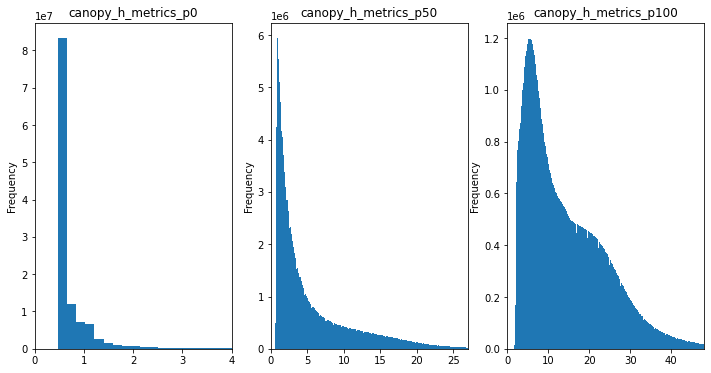

In [7]:
cols_p = ['p0', 'p50', 'p100']

fig, axes = plt.subplots(ncols=len(cols_p), figsize=(12,6))

for cp,i in zip(cols_p,range(0,len(cols_p))):
    c = f'canopy_h_metrics_{cp}'
    xlim = (0,int(np.percentile(data[c],[99]).round()))
    data[c].plot(kind='hist',bins=1000, ax = axes[i], subplots=True, xlim=xlim)
    axes[i].set_title(c)

plt.show()

The ```canopy_rh_conf``` refers to confidence flag based on percentage of ground and canopy photons within a segment: 
- 0 (<5% canopy), 
- 1 (>5% canopy, <5% ground), 
- 2 (>5% canopy, >5% ground).

<AxesSubplot:>

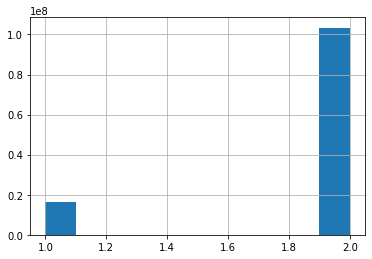

In [8]:
data['canopy_rh_conf'].hist()

After reading the data let's select randomly 10,000 data points to convert to [GeoPandas DataFrame](https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html).

In [9]:
samples = data.sample(100000)
samples = gpd.GeoDataFrame(samples, geometry=gpd.points_from_xy(samples.lon, samples.lat))
samples = samples.set_crs('EPSG:4326')
samples

lon        lat  canopy_openness  canopy_h_metrics_p0  \
3149557   -108.214081  39.623497             0.81                 0.50   
53225226  -119.417358  37.728451             4.39                 0.50   
116049234 -108.677101  39.361801             2.37                 0.60   
96148660  -106.077881  40.480156             4.28                 0.50   
109168061 -109.327721  33.181671             1.74                 0.93   
...               ...        ...              ...                  ...   
115320334 -100.763084  32.880764             2.48                 0.52   
59620996  -117.824028  35.394871             1.62                 0.53   
65805333  -115.134392  36.188225             1.71                 0.50   
103524097 -101.312454  39.732712             0.67                 0.50   
31013911  -118.786957  35.203842             3.17                 1.55   

           canopy_h_metrics_p50  canopy_h_metrics_p100  canopy_rh_conf  \
3149557                    1.03                   6.96               2   
53225226                   0.95                  20.84               2   
116049234                  4.00                  12.19               1   
96148660                   2.57                  18.48               2   
109168061                  3.18                   8.32               2   
...                         ...                    ...             ...   
115320334                  1.51                  12.51               2   
59620996                   1.03                   7.68               2   
65805333                   1.36                   9.61               2   
103524097                  0.71                   3.40               2   
31013911                   6.03                  11.82               2   

                                  start_dt                     geometry  
3149557   2018-11-14 09:22:33.280094+00:00  POINT (-108.21408 39.62350)  
53225226  2020-02-05 12:38:53.830128+00:00  POINT (-119.41736 37.72845)  
116049234 2021-06-12 12:26:54.888099+00:00  POINT (-108.67710 39.36180)  
96148660  2020-12-31 07:51:26.246222+00:00  POINT (-106.07788 40.48016)  
109168061 2021-04-21 02:49:40.327642+00:00  POINT (-109.32772 33.18167)  
...                                    ...                          ...  
115320334 2021-06-07 00:01:06.360638+00:00  POINT (-100.76308 32.88076)  
59620996  2020-04-04 21:36:17.776384+00:00  POINT (-117.82403 35.39487)  
65805333  2020-05-20 19:12:04.568920+00:00  POINT (-115.13439 36.18822)  
103524097 2021-03-08 04:21:32.148510+00:00  POINT (-101.31245 39.73271)  
31013911  2019-08-03 21:27:23.717590+00:00  POINT (-118.78696 35.20384)  

[100000 rows x 9 columns]

Now it's possible to visualize the data points over a map:

(24.61521339416504, 49.34292221069336)

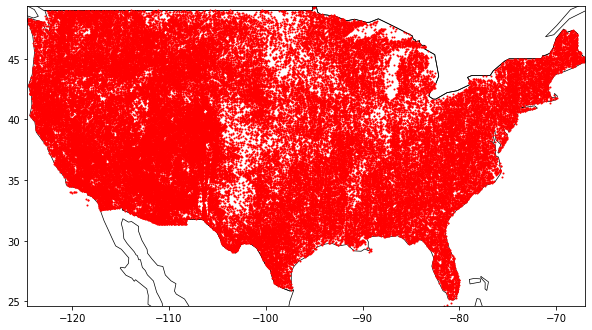

In [12]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 6), facecolor="none", edgecolor='black', lw=0.7)
samples.plot(ax=ax, marker='o', color='red', markersize=1);

minx, miny, maxx, maxy = samples.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

... and save them as geopackage

In [13]:
samples.to_file('veg_canopy.height_icesat2.atl08_100m_2018..2020_usa48.subsample.gpkg',  driver="GPKG")